# 2. 신경망 기본 구성 요소

__감사말__

프랑소와 숄레의 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 2장에 사용된 코드에 대한 설명을 담고 있으며 텐서플로우 2.6 버전 이상에서 작성되었습니다. 소스코드를 공개한 저자에게 감사드립니다.

__구글 코랩 설정__

'런타임 -> 런타임 유형 변경' 메뉴에서 GPU를 지정한다.
TensorFlow 버전을 확인하려면 아래 명령문을 실행한다.

In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

TensorFlow가 GPU를 사용하는지 여부를 확인하려면 아래 명령문을 실행한다.
아래와 같은 결과가 나오면 GPU가 제대로 지원됨을 의미한다.

```
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
```

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**참고**

아래 코드에 대한 자세한 설명은
[신경망 구성 요소](https://codingalzi.github.io/dlp2/building_blocks_of_NN.html)를
참고한다.

## 신경망 모델 기초 훈련법

**케라스로 MNIST 데이터셋 불러오기**

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


훈련셋 정보

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

테스트셋 정보

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**신경망 모델의 구조 지정**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"), # 음수나 -값을 0으로 변환, 활성화 함수는 출력층에서 사용
    layers.Dense(10, activation="softmax")
])

**신경망 모델 컴파일**

In [11]:
model.compile(optimizer="rmsprop", # 최적화 알고리즘의 한 종류로 sgd 함게 사용, 기울기 갱신시에 안정성을 향상시켜주는
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**이미지 데이터 전처리**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) # 60000, 784
train_images = train_images.astype("float32") / 255   # 0과 1사이의 값
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255     # 0과 1사이의 값
train_images[0]

**모델 훈련**

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 2.2305 - accuracy: 0.2717
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.6458 - accuracy: 0.5975
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.0244 - accuracy: 0.7513
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7383 - accuracy: 0.8116
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5992 - accuracy: 0.8407


## 훈련된 모델 활용과 평가

**모델 활용: 예측하기**

In [15]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 68ms/step


0번 이미지에 대한 예측값

In [16]:
predictions[0]

array([4.46326798e-04, 5.55685438e-05, 1.11356436e-04, 1.10266439e-03,
       1.25294039e-03, 1.53124903e-03, 7.27878160e-06, 9.69533026e-01,
       3.15771322e-04, 2.56439690e-02], dtype=float32)

가장 높은 확률값을 갖는 인덱스는 7.

In [17]:
predictions[0].argmax()

7

0번 이미지가 가리키는 숫자가 7일 확률이 99.98% 정도.



In [18]:
predictions[0][7]

0.969533

실제로 첫째 이미지의 레이블이 7임.

In [19]:
test_labels[0]

7

**모델 성능 테스트**

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.5396 - accuracy: 0.8529
test_acc: 0.8529000282287598


## 텐서

**넘파이 어레이와 텐서**

- 0차원(0D) 텐서

In [25]:
import numpy as np

x = np.array(12)
x

array(12)

텐서의 차원은 `ndim` 속성이 가리킨다.

In [26]:
x.ndim

0

- 1차원(1D) 텐서

In [27]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [28]:
x.ndim

1

- 2차원(2D) 텐서

In [29]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [30]:
x.ndim

2

- 3차원(3D) 텐서

In [32]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

In [33]:
x.ndim

3

**텐서 주요 속성**

MNIST 훈련 세트를 대상으로 언급된 속성을 확인해보자.
앞서 모양을 변형하였기에 다시 원본 데이터를 불러온다.

In [34]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

- `ndim` 속성

In [36]:
train_images.ndim # 60000, 28, 28

3

- `shape` 속성

In [37]:
train_images.shape

(60000, 28, 28)

- `dtype` 속성

In [38]:
train_images.dtype

dtype('uint8')

**텐서 활용**

*인덱싱*

훈련 세트에 포함된 이미지 중에서 4번 인덱스의 이미지, 즉 다섯 번째 이미지를 직접 확인해보자.
이를 위해 pyplot 모듈의 `imshow()` 함수를 이용한다.

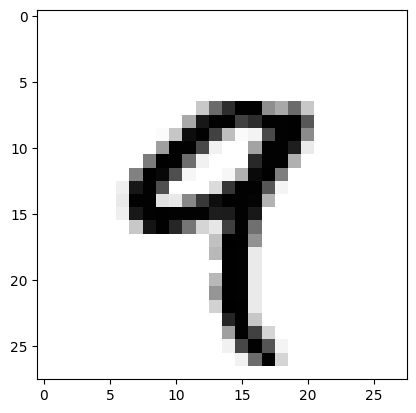

In [39]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

다섯 번째(4번 인덱스) 이미지는 실제로 숫자 9를 가리킨다.

In [40]:
train_labels[4]

9

*슬라이싱*

케라스를 포함하여 대부분의 딥러닝 모델은 훈련 세트 전체를 한꺼번에 처리하지 않고
지정된 크기(`batch_size`)의 배치로 나주어 처리한다.
앞서 살펴본 모델의 배치 크기는 128이었다.

- 첫째 배치

In [41]:
batch = train_images[:128] # 0 ~ 127 (128개)

- 둘째 배치

In [42]:
batch = train_images[128:256]

- n 번째 배치

```python
batch = train_images[128 * n:128 * (n + 1)]
```

## 텐서 연산

[링크 텍스트](https://)**항목별 연산과 브로드캐스팅**

*항목별 연산*

항목별 덧셈을 직접 구현한다.

In [56]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

*브로드캐스팅*

아래 코드는 2D 텐서와 1D 텐서의 합이 이루어지는 과정을 보여준다.

In [43]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [46]:
X[0]

array([0.47367408, 0.85460683, 0.13721316, 0.95094701, 0.59393634,
       0.2298551 , 0.51473972, 0.59281388, 0.40684625, 0.39816553])

In [47]:
y

array([0.84173345, 0.87396782, 0.16788264, 0.36056126, 0.31100738,
       0.92926079, 0.30972488, 0.6267756 , 0.97825208, 0.52421337])

`(10,)` 모양의 1D 텐서 `y`를 0번 축을 추가하여 `(1, 10)` 모양의 2D 텐서 `y2`로 변환한다.

In [50]:
y2 = np.expand_dims(y, axis=0) # 1x10(2차원)
y2

array([[0.84173345, 0.87396782, 0.16788264, 0.36056126, 0.31100738,
        0.92926079, 0.30972488, 0.6267756 , 0.97825208, 0.52421337]])

이제 `y2`를 32번 복제하여 `(32, 10)` 모양의 2D 텐서 `Y`로 변환한 후 항목별 덧셈을 실행한다.

In [51]:
Y = np.concatenate([y2] * 32, axis=0)

In [52]:
Y.shape

(32, 10)

In [53]:
((X + y) == (X + Y)).all()

True

**유니버설 함수**

`relu()` 함수를 직접 구현한다.

In [58]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

넘파이의 경우 항목별 연산을 병렬처리가 가능하며
매우 효율적으로 작동하는 저수준 언어로 구현되어 있다.
아래 두 코드는 넘파이를 활용할 때와 그렇지 않을 때의
처리속도의 차이를 잘 보여준다.

In [54]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))
print(x, x.shape)

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print(f"Took: {time.time() - t0:.2f}초")

[[0.39803938 0.44059846 0.83005165 ... 0.71940402 0.32955247 0.53500942]
 [0.0652703  0.56003604 0.13296933 ... 0.06113541 0.23618659 0.21348577]
 [0.22404332 0.01213194 0.40089611 ... 0.32942083 0.26172566 0.62169873]
 ...
 [0.32340975 0.45011646 0.74401967 ... 0.759741   0.63896007 0.20663759]
 [0.76118519 0.41412045 0.71936951 ... 0.00407834 0.33598052 0.37735831]
 [0.41094667 0.26384802 0.07067144 ... 0.25590364 0.78705803 0.499383  ]] (20, 100)
Took: 0.01초


In [59]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print(f"Took: {time.time() - t0:.2f}초")

Took: 2.35초


**텐서 곱**

텐서의 점 곱(dot product)은 차원에 따라 다른 계산을 수행한다.

- 두 벡터의 점곱

In [63]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
print(x[0])
z

0.5780903779863923


8.80215316067347

직접 구현하면 다음과 같다.

In [64]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [65]:
naive_vector_dot(x, y)

8.802153160673472

- 2D 텐서와 벡터의 점곱 (방식 1)

In [66]:
x = np.random.random((2,3))
y = np.random.random((3,))
print(x.shape, y.shape)
z = np.dot(x, y)
z

(2, 3) (3,)


array([1.8267002 , 0.71105914])

In [67]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [68]:
naive_matrix_vector_dot(x, y)

array([1.8267002 , 0.71105914])

- 2D 텐서와 벡터의 점곱 (방식 2)

In [69]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [70]:
naive_matrix_vector_dot(x, y)

array([1.8267002 , 0.71105914])

- 2D 텐서와 2D 텐서의 점곱 (행렬의 곱)

In [71]:
x = np.random.random((2,3))
y = np.random.random((3,4))
z = np.dot(x, y)
z

array([[0.53819871, 0.19174896, 0.78000104, 0.63924369],
       [0.89215916, 0.7308066 , 1.31753523, 0.82776824]])

In [72]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [73]:
naive_matrix_dot(x, y)

array([[0.53819871, 0.19174896, 0.78000104, 0.63924369],
       [0.89215916, 0.7308066 , 1.31753523, 0.82776824]])

## 텐서 모양 변형

- `reshape()` 메서드: `reshape()` 메서드는
텐서에 포함된 항목의 개수는 변하지 않으면서
원하는 모양의 텐서를 생성한다.
아래 코드는 텐서의 모양 변환을 설명하는 간단한 예제를 보여준다.

In [74]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [75]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

- `transpose()` 메서드: 행렬(2D 텐서)의 행과 열을 서로 바꾼
    **전치 행렬**을 반환한다.

In [76]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)